# AirBnb in Brussels

## The dataset

The dataset is obtained from "[inside AirBnb](https://insideairbnb.com/get-the-data/)" and distributed under the [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/).

## The analysis

This markdown document is a summary of the results of the data analysis.
The code is reported in the following cells.

### Checking the scores

The dataset contains six kinds of scores:
* review_scores_rating (overall score)
* review_scores_accuracy (accuracy of the description)
* review_scores_cleanliness (cleanliness score)
* review_scores_checkin (check-in experience)
* review_scores_communication (communication experience)
* review_scores_location (location score)

We plot the correlation matrix of these scores.

![Correlation Scores](correlation_scores.png)

We draw three observations.

First, the *location* score has a low correlation with all the other scores. We explain this by noticing that the quality of the location (intended as the neighborhood) is not directly under the control of the host. For example, a host can offer an excellent experience in terms of accuracy, cleanliness, check-in, and communication, but cannot do much to improve the quality of their neighborhood. **Interestingly, we observe that the location does not correlate much with the overall score, indicating that the users, on average, do not penalize much a host by lowering the overall score when the location is not satisfactory.**

Second, the *cleanliness* does not correlate well with *check-in* and *communication*. We explain this by noticing that, most commonly, the entity providing the cleaning service is different from the one providing the check-in and communication. Consequently, it is reasonable to observe that their scores do not correlate well.

Finally, we observe how the *overall* score correlates with the others. We see that *accuracy* is the most correlated one, followed by *cleanliness*, *check-in experience*, *communication* and, at last, *location*. **This can be interpreted as a list of what is more important to the user.** According to this list, an inaccurate description can affect more the overall score than bad communication.



### Location score and price per neighborhood

Continuing the analysis started in the previous section, we visualize the location scores by neighborhood. Dots indicate the mean value and error bars indicate the standard deviation.

<img src="neighborhoods_scores.png"/> 

**This seems to be well correlated with the real estate value per neighborhood.** This finding is easy to explain: the real estate value is a good predictor of the attractiveness of a neighborhood, and consequently, it correlates well with the rating that the users give to a specific location.

<img src="real_estate_prices.png" width="500"/>

The same trend is found in the prices. To facilitate comparisons, we only considered accommodations for 2 persons.

<img src="neighborhoods_prices.png"/>



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

filename = "listings.csv"
cols=["host_id","host_since","host_response_time","host_response_rate",
      "host_acceptance_rate","host_is_superhost","host_neighbourhood",
      "host_listings_count","host_total_listings_count","host_has_profile_pic",
      "host_identity_verified","neighbourhood_cleansed","latitude",
      "longitude","property_type","room_type",
      "accommodates",
      "beds","price",
      "number_of_reviews","review_scores_rating","review_scores_accuracy",
      "review_scores_cleanliness","review_scores_checkin","review_scores_communication",
      "review_scores_location","review_scores_value","instant_bookable",
      "calculated_host_listings_count","calculated_host_listings_count_entire_homes","calculated_host_listings_count_private_rooms",
      "calculated_host_listings_count_shared_rooms","reviews_per_month"]
data = pd.read_csv(filename, usecols=cols)

# Convert the prices from string to floats
data['price'] = data['price'].str.replace('\$', '', regex=True).str.replace(',', '').astype(float)

# Drop some entries that are clearly broken (normal appartments with price > 1500€ per night)
to_drop = [396, 1530, 1531]
data.drop(to_drop, inplace=True)

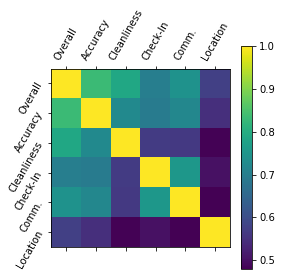

In [2]:
# Evaluate the correlation among different kinds of score

columns = ["review_scores_rating","review_scores_accuracy", "review_scores_cleanliness",
           "review_scores_checkin","review_scores_communication", "review_scores_location"]
labels  = ["Overall", "Accuracy", "Cleanliness","Check-In", "Comm.", "Location"]
plt.matshow(data[columns].corr())
plt.xticks(range(6), labels, rotation=60)
plt.yticks(range(6), labels, rotation=60)
plt.ylim(5.5, -0.5)
plt.colorbar()
plt.savefig('correlation_scores.png')

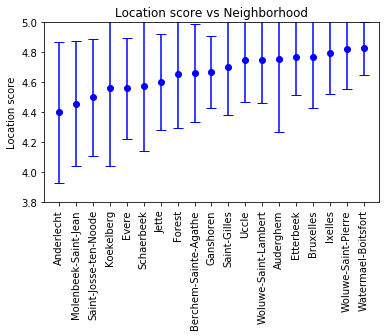

In [3]:
# Extract the location score for each neighborhood

neighborhoods = data["neighbourhood_cleansed"].unique()

mean_total = data.groupby('neighbourhood_cleansed')['review_scores_location'].mean()
std_total  = data.groupby('neighbourhood_cleansed')['review_scores_location'].std()
mean_per_neighborhood = [mean_total[entry] for entry in neighborhoods]
std_per_neighborhood  = [std_total[entry] for entry in neighborhoods]

# Sort by mean score
sorted_indexes = [i for i, _ in sorted(enumerate(mean_per_neighborhood), key=lambda x:x[1])]
neighborhoods = [neighborhoods[idx] for idx in sorted_indexes]
mean_per_neighborhood = [mean_per_neighborhood[idx] for idx in sorted_indexes]
std_per_neighborhood  = [std_per_neighborhood[idx] for idx in sorted_indexes]

for i in range(len(neighborhoods)):
    plt.errorbar(i, mean_per_neighborhood[i], yerr=std_per_neighborhood[i], fmt='o', color='blue', ecolor='blue', capsize=5)
plt.ylim(3.8, 5)
plt.xticks(range(len(neighborhoods)), neighborhoods, rotation=90)
plt.ylabel("Location score")
plt.gcf().set_figheight(5)
plt.gcf().subplots_adjust(bottom=0.38)
plt.title("Location score vs Neighborhood")
plt.savefig('neighborhoods_scores.png')

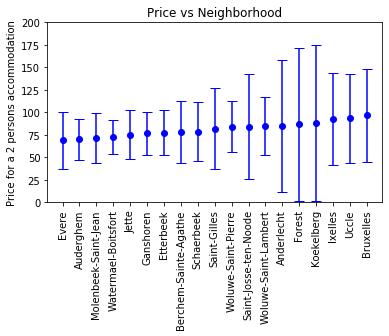

In [4]:
# Extract the price for each neighborhood

neighborhoods = data["neighbourhood_cleansed"].unique()

mean_total = data[data['accommodates']==2].groupby('neighbourhood_cleansed')['price'].mean()
std_total  = data[data['accommodates']==2].groupby('neighbourhood_cleansed')['price'].std()
mean_per_neighborhood = [mean_total[entry] for entry in neighborhoods]
std_per_neighborhood  = [std_total[entry] for entry in neighborhoods]

# Sort by mean score
sorted_indexes = [i for i, _ in sorted(enumerate(mean_per_neighborhood), key=lambda x:x[1])]
neighborhoods = [neighborhoods[idx] for idx in sorted_indexes]
mean_per_neighborhood = [mean_per_neighborhood[idx] for idx in sorted_indexes]
std_per_neighborhood  = [std_per_neighborhood[idx] for idx in sorted_indexes]

for i in range(len(neighborhoods)):
    plt.errorbar(i, mean_per_neighborhood[i], yerr=std_per_neighborhood[i], fmt='o', color='blue', ecolor='blue', capsize=5)
plt.ylim(0, 200)
plt.xticks(range(len(neighborhoods)), neighborhoods, rotation=90)
plt.ylabel("Price for a 2 persons accommodation")
plt.gcf().set_figheight(5)
plt.gcf().subplots_adjust(bottom=0.38)
plt.title("Price vs Neighborhood")
plt.savefig('neighborhoods_prices.png')
